train.csv shape is  (785, 32)

     contestant_name  age            hometown                profession  \
0  Sonja Christopher   63   Walnut Creek,  CA  Musician/Retired Teacher   
1      B.B. Andersen   64  Mission Hills,  KS     Real Estate Developer   
2    Stacey Stillman   27  San Francisco,  CA                  Attorney   
3        Ramona Gray   29         Edison,  NJ                Biochemist   
4          Dirk Been   23   Spring Green,  WI              Dairy Farmer   

   num_season  finish gender  african_american  asian_american  \
0           1      16      F                 0               0   
1           1      15      M                 0               0   
2           1      14      F                 0               0   
3           1      13      F                 1               0   
4           1      12      M                 0               0   

   latin_american  ...  num_boot  tribe1  tribe2  tribe3 quit evac  ejected  \
0               0  ...         1    Tagi  

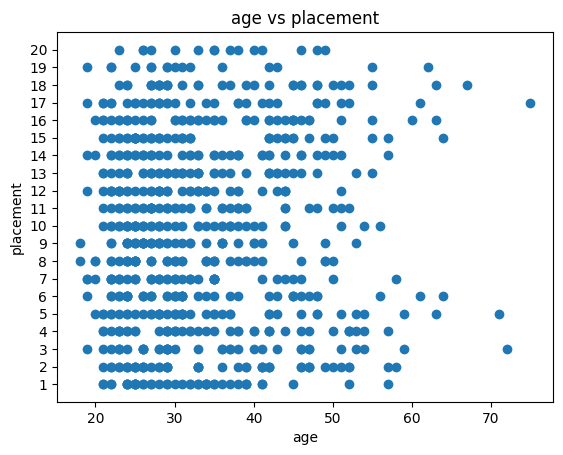

,contestant_name,age,hometown,profession,num_season,finish,gender,african_american,asian_american,latin_american,...,num_boot,tribe1,tribe2,tribe3,quit,evac,ejected,fmc,num_jury_votes,normalized_finish
0,Sonja Christopher,63,"Walnut Creek, CA",Musician/Retired Teacher,1,16,0,0,0,0,...,1,Tagi,NaN,NaN,0,0,0,0,NaN,0.0000
1,B.B. Andersen,64,"Mission Hills, KS",Real Estate Developer,1,15,1,0,0,0,...,2,Pagong,NaN,NaN,0,0,0,0,NaN,0.0625
2,Stacey Stillman,27,"San Francisco, CA",Attorney,1,14,0,0,0,0,...,3,Tagi,NaN,NaN,0,0,0,0,NaN,0.1250
3,Ramona Gray,29,"Edison, NJ",Biochemist,1,13,0,1,0,0,...,4,Pagong,NaN,NaN,0,0,0,0,NaN,0.1875
4,Dirk Been,23,"Spring Green, WI",Dairy Farmer,1,12,1,0,0,0,...,5,Tagi,NaN,NaN,0,0,0,0,NaN,0.2500


In [129]:
import pandas as pd
import matplotlib.pyplot as plt

trainingSet = pd.read_csv("contestant_table.csv")

print("train.csv shape is ", trainingSet.shape)
print()

print(trainingSet.head())
print()

print(trainingSet.describe())

# change M to 1 and F to 0
trainingSet['gender'] = trainingSet['gender'].replace({'M': 1, 'F': 0, 'N': 2})

plt.scatter(trainingSet['age'], trainingSet['finish'])
plt.xlabel('age')
plt.ylabel('placement')
plt.title('age vs placement')
plt.ylim(0, 21)  # set the limits of the y-axis
plt.yticks(range(1, 21))  # set the ticks on the y-axis
plt.show()

trainingSet.head()

## Feature Extraction

In [130]:
print(trainingSet.columns)

columns_to_keep = ['age', 'gender', 'african_american', 'asian_american',
       'latin_american', 'poc', 'jewish', 'muslim', 'lgbt', 'normalized_finish'] # , 'normalized_finish', 'finish

# drop all other columns
trainingSet = trainingSet.drop(trainingSet.columns.difference(columns_to_keep), axis=1)

print(trainingSet.columns)


Index(['contestant_name', 'age', 'hometown', 'profession', 'num_season',
       'finish', 'gender', 'african_american', 'asian_american',
       'latin_american', 'poc', 'jewish', 'muslim', 'lgbt', 'state', 'country',
       'num_appearance', 'birthdate', 'merge', 'jury', 'ftc', 'votes_against',
       'num_boot', 'tribe1', 'tribe2', 'tribe3', 'quit', 'evac', 'ejected',
       'fmc', 'num_jury_votes', 'normalized_finish'],
      dtype='object')
Index(['age', 'gender', 'african_american', 'asian_american', 'latin_american',
       'poc', 'jewish', 'muslim', 'lgbt', 'normalized_finish'],
      dtype='object')


In [131]:
# change finish to 1 if won, 0 otherwise
# trainingSet['finish'] = trainingSet['finish'].apply(lambda x: 1 if x == 1 else 0)

# rename finish to win
# trainingSet = trainingSet.rename(columns={'finish': 'winner'})

# change M to 1 and F to 0
trainingSet['gender'] = trainingSet['gender'].replace({'M': 1, 'F': 0, "N": 2})

trainingSet.head()

,age,gender,african_american,asian_american,latin_american,poc,jewish,muslim,lgbt,normalized_finish
0,63,0,0,0,0,0,0,0,1,0.0000
1,64,1,0,0,0,0,0,0,0,0.0625
2,27,0,0,0,0,0,0,0,0,0.1250
3,29,0,1,0,0,1,0,0,0,0.1875
4,23,1,0,0,0,0,0,0,0,0.2500


In [132]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

############################## THIS SECTION IS FOR TRAINING BASED OFF THE WINNER COLUMN ######################################

# # 'winner' is target column and the rest are features
# X = trainingSet.drop('winner', axis=1)
# Y = trainingSet['winner']

# # split data into training and testing sets
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# # create a decision tree regressor object
# regressor = DecisionTreeRegressor(random_state=0)

# # fit the model
# regressor.fit(X_train, Y_train)

# # make predictions
# y_pred = regressor.predict(X_test)


######################### THIS SECTION IS FOR TRAINING BASED OFF THE NORMALIZED FINISH COLUMN ###############################

# 'normalized_finish' is target column and the rest are features
X = trainingSet.drop('normalized_finish', axis=1)
Y = trainingSet['normalized_finish']

# split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# create a decision tree regressor object
regressor = DecisionTreeRegressor(random_state=0)

# fit the model
regressor.fit(X_train, Y_train)

# make predictions
y_pred = regressor.predict(X_test)

In [133]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# calculate MSE
mse = mean_squared_error(Y_test, y_pred)
print('Mean Squared Error:', mse)

# calculate RMSE
rmse = mean_squared_error(Y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

# calculate MAE
mae = mean_absolute_error(Y_test, y_pred)
print('Mean Absolute Error:', mae)

# calculate R^2 score
r2 = r2_score(Y_test, y_pred)
print('R^2 score:', r2)

Mean Squared Error: 0.12618735905642534
Root Mean Squared Error: 0.35522860112387533
Mean Absolute Error: 0.29205358763081696
R^2 score: -0.5792685157702879


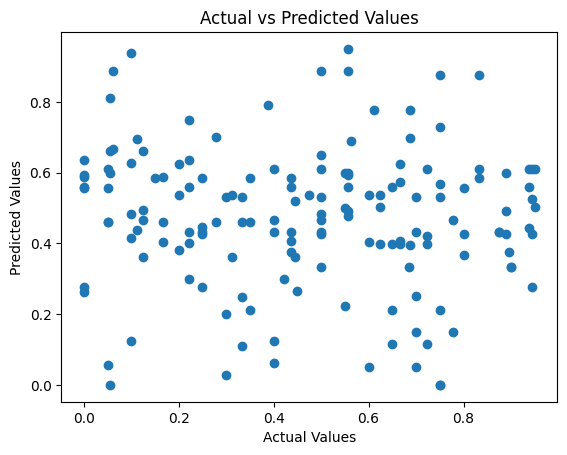

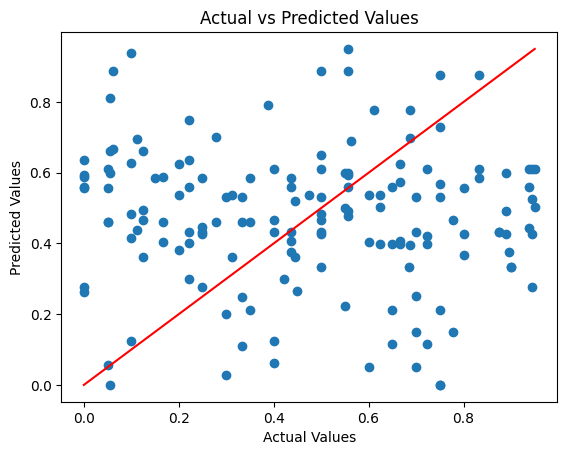

In [135]:
import matplotlib.pyplot as plt

plt.scatter(Y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# red line represents perfect predictions
plt.scatter(Y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red')  
plt.show()